# Qualitative Comparison of Variational Autoencoders (VAE) on MNIST

3 VAEs are compared:
1. without Normalizing Flows
2. with Planar Normalizing Flow
3. with Sylvester Normalizing Flow

In [8]:
import torch
import torch.utils.data as tdata
from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

from NF.autoencoders import VariationalAutoencoderOriginal, VariationalAutoencoderNormalizingFlow
from NF.transformations import PlanarTransformation, TriagSylvesterTransformation
from NF.training import train, test
from NF.utils import plot_image

In [9]:
DEVICE = 'cuda'

img_rows=28
img_cols=28

train_loader = tdata.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=100, shuffle=True)
test_loader = tdata.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.ToTensor()),
    batch_size=100, shuffle=False)

# a large batch will be used to compute average flow parameters after training
large_batch = []
for i, (data, _) in enumerate(train_loader):
    if i > 1000:
        break
    large_batch.append(data)
large_batch = torch.cat(large_batch).view(-1, img_rows * img_cols).to(DEVICE)

In [10]:
flow_len = 16
num_latent = 20

vae_names = ['VAE Original', 'VAENF Planar', 'VAENF Sylvester']

vaes = [
    VariationalAutoencoderOriginal( img_rows * img_cols, num_latent ).to(DEVICE),
    VariationalAutoencoderNormalizingFlow( img_rows * img_cols, num_latent, PlanarTransformation, num_latent, flow_len ).to(DEVICE),
    VariationalAutoencoderNormalizingFlow( img_rows * img_cols, num_latent, TriagSylvesterTransformation, num_latent, flow_len ).to(DEVICE)
]

optimizers = []
for vae in vaes:
    optimizers.append( optim.Adam( vae.parameters(), lr=1e-3 ) )

sylv_vae = VariationalAutoencoderNormalizingFlow(784, 20, TriagSylvesterTransformation, 20, 16).to(DEVICE)
optimizer = optim.Adam(sylv_vae.parameters(), lr=1e-3)

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.028359
====> Epoch: 1 Average loss: 124.6922


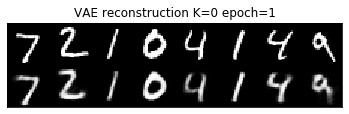

====> Test set loss: 84.3847


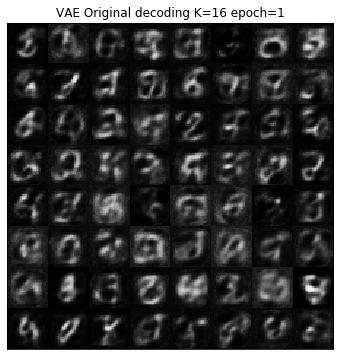

Train Epoch: 2 [0/60000 (0%)]	Loss: 88.196572
====> Epoch: 2 Average loss: 80.8295


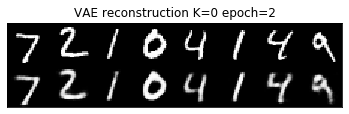

====> Test set loss: 76.8407
Train Epoch: 3 [0/60000 (0%)]	Loss: 74.787402
====> Epoch: 3 Average loss: 75.9344


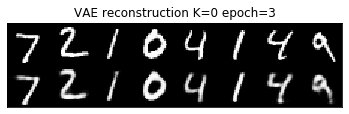

====> Test set loss: 73.8178
Train Epoch: 4 [0/60000 (0%)]	Loss: 72.648379
====> Epoch: 4 Average loss: 73.5047


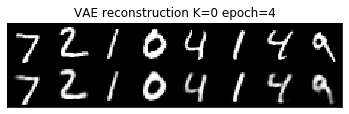

====> Test set loss: 72.0864
Train Epoch: 5 [0/60000 (0%)]	Loss: 68.635898
====> Epoch: 5 Average loss: 71.9771


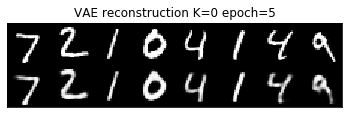

====> Test set loss: 70.9495
Train Epoch: 6 [0/60000 (0%)]	Loss: 73.422900
====> Epoch: 6 Average loss: 70.8688


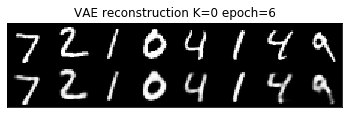

====> Test set loss: 70.2316
Train Epoch: 7 [0/60000 (0%)]	Loss: 71.152261
====> Epoch: 7 Average loss: 70.0642


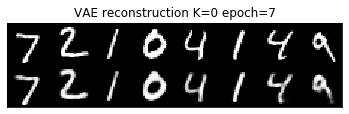

====> Test set loss: 69.5995
Train Epoch: 8 [0/60000 (0%)]	Loss: 64.146128
====> Epoch: 8 Average loss: 69.4136


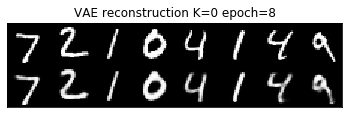

====> Test set loss: 68.9768
Train Epoch: 9 [0/60000 (0%)]	Loss: 67.601978
====> Epoch: 9 Average loss: 68.8701


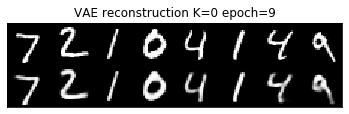

====> Test set loss: 68.5359
Train Epoch: 10 [0/60000 (0%)]	Loss: 74.124434
====> Epoch: 10 Average loss: 68.4194


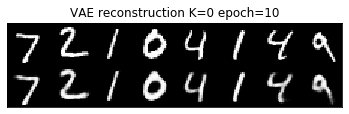

====> Test set loss: 68.2412
Train Epoch: 11 [0/60000 (0%)]	Loss: 71.609927
====> Epoch: 11 Average loss: 68.0584


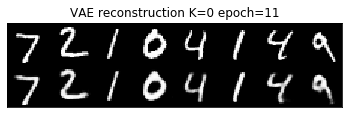

====> Test set loss: 67.8882


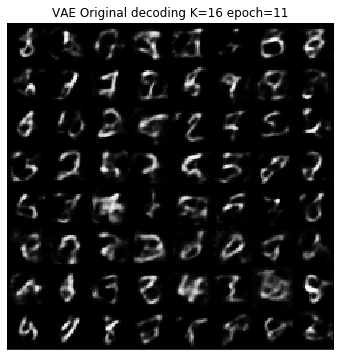

Train Epoch: 12 [0/60000 (0%)]	Loss: 69.528262
====> Epoch: 12 Average loss: 67.7119


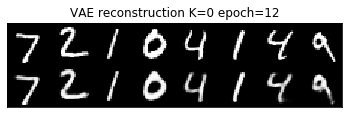

====> Test set loss: 67.7583
Train Epoch: 13 [0/60000 (0%)]	Loss: 65.810884
====> Epoch: 13 Average loss: 67.4224


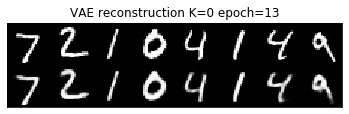

====> Test set loss: 67.5881
Train Epoch: 14 [0/60000 (0%)]	Loss: 67.943721
====> Epoch: 14 Average loss: 67.1687


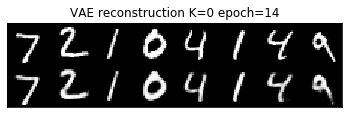

====> Test set loss: 67.2544
Train Epoch: 15 [0/60000 (0%)]	Loss: 67.058169
====> Epoch: 15 Average loss: 66.9238


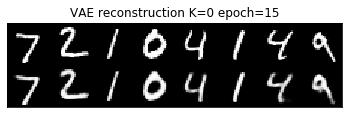

====> Test set loss: 67.1379
Train Epoch: 16 [0/60000 (0%)]	Loss: 64.497622
====> Epoch: 16 Average loss: 66.7280


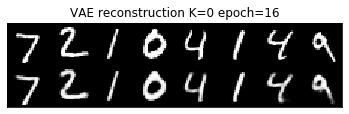

====> Test set loss: 67.0247
Train Epoch: 17 [0/60000 (0%)]	Loss: 66.029102
====> Epoch: 17 Average loss: 66.5393


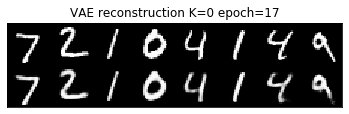

====> Test set loss: 66.8310
Train Epoch: 18 [0/60000 (0%)]	Loss: 65.421914
====> Epoch: 18 Average loss: 66.3693


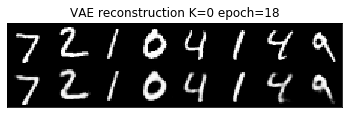

====> Test set loss: 66.6987
Train Epoch: 19 [0/60000 (0%)]	Loss: 64.565703
====> Epoch: 19 Average loss: 66.2053


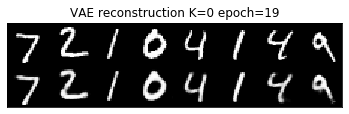

====> Test set loss: 66.6347
Train Epoch: 20 [0/60000 (0%)]	Loss: 62.106162
====> Epoch: 20 Average loss: 66.0602


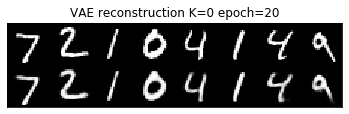

====> Test set loss: 66.4867
Train Epoch: 21 [0/60000 (0%)]	Loss: 65.130249
====> Epoch: 21 Average loss: 65.9244


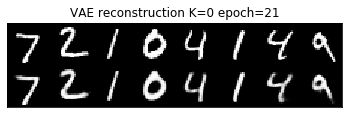

====> Test set loss: 66.4090


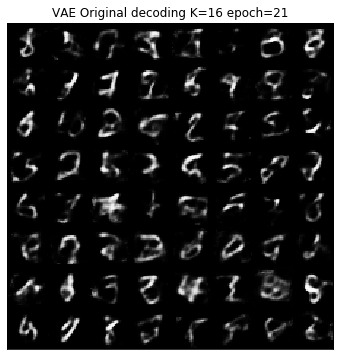

Train Epoch: 22 [0/60000 (0%)]	Loss: 62.880752
====> Epoch: 22 Average loss: 65.8003


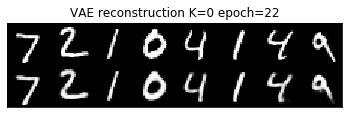

====> Test set loss: 66.2730
Train Epoch: 23 [0/60000 (0%)]	Loss: 63.834395
====> Epoch: 23 Average loss: 65.6728


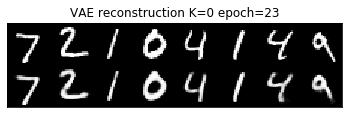

====> Test set loss: 66.1631
Train Epoch: 24 [0/60000 (0%)]	Loss: 63.305049
====> Epoch: 24 Average loss: 65.5592


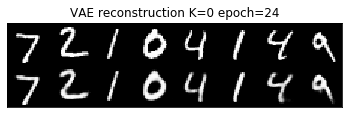

====> Test set loss: 66.1811
Train Epoch: 25 [0/60000 (0%)]	Loss: 65.299229
====> Epoch: 25 Average loss: 65.4620


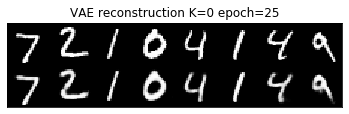

====> Test set loss: 66.1252
Train Epoch: 26 [0/60000 (0%)]	Loss: 65.876084
====> Epoch: 26 Average loss: 65.3623


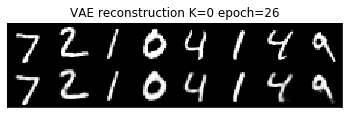

====> Test set loss: 66.0487
Train Epoch: 27 [0/60000 (0%)]	Loss: 67.022739
====> Epoch: 27 Average loss: 65.2743


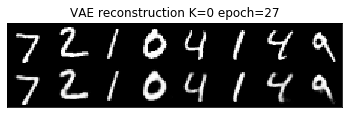

====> Test set loss: 66.0091
Train Epoch: 28 [0/60000 (0%)]	Loss: 61.405024
====> Epoch: 28 Average loss: 65.1833


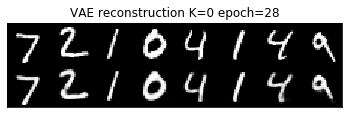

====> Test set loss: 65.8921
Train Epoch: 29 [0/60000 (0%)]	Loss: 63.341221
====> Epoch: 29 Average loss: 65.0897


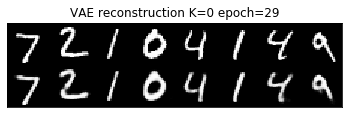

====> Test set loss: 65.8572
Train Epoch: 30 [0/60000 (0%)]	Loss: 62.316606
====> Epoch: 30 Average loss: 65.0225


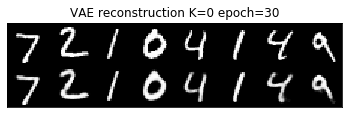

====> Test set loss: 65.7859
Train Epoch: 31 [0/60000 (0%)]	Loss: 64.774297
====> Epoch: 31 Average loss: 64.9370


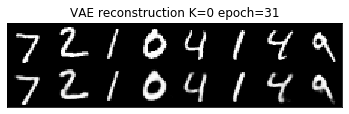

====> Test set loss: 65.7878


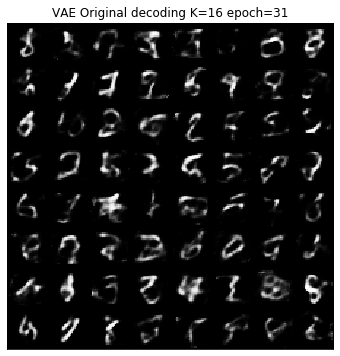

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.582695
====> Epoch: 1 Average loss: 138.5663


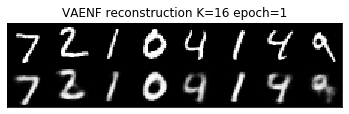

====> Test set loss: 101.3440


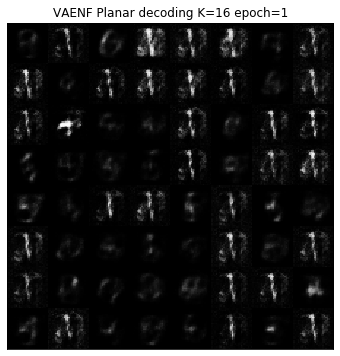

Train Epoch: 2 [0/60000 (0%)]	Loss: 106.273398
====> Epoch: 2 Average loss: 92.7534


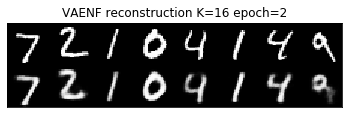

====> Test set loss: 86.3009
Train Epoch: 3 [0/60000 (0%)]	Loss: 88.164707
====> Epoch: 3 Average loss: 89.1842


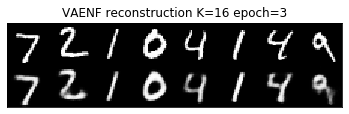

====> Test set loss: 85.3048
Train Epoch: 4 [0/60000 (0%)]	Loss: 82.886543
====> Epoch: 4 Average loss: 81.9155


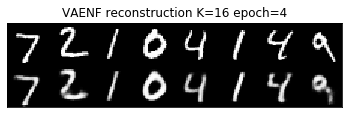

====> Test set loss: 80.7508
Train Epoch: 5 [0/60000 (0%)]	Loss: 85.677256
====> Epoch: 5 Average loss: 78.9961


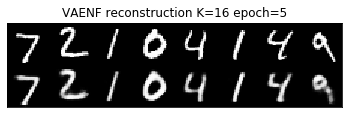

====> Test set loss: 77.8279
Train Epoch: 6 [0/60000 (0%)]	Loss: 75.305610
====> Epoch: 6 Average loss: 78.5672


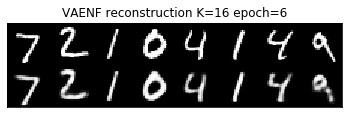

====> Test set loss: 77.5558
Train Epoch: 7 [0/60000 (0%)]	Loss: 82.353340
====> Epoch: 7 Average loss: 75.9276


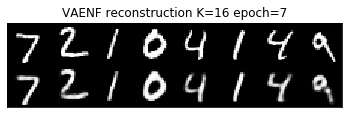

====> Test set loss: 77.7919
Train Epoch: 8 [0/60000 (0%)]	Loss: 82.525254
====> Epoch: 8 Average loss: 75.2464


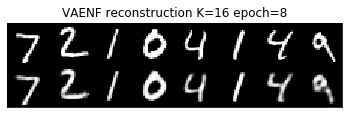

====> Test set loss: 74.5837
Train Epoch: 9 [0/60000 (0%)]	Loss: 70.697866
====> Epoch: 9 Average loss: 74.7248


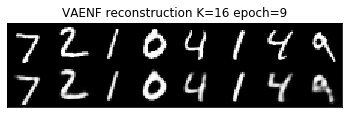

====> Test set loss: 75.5890
Train Epoch: 10 [0/60000 (0%)]	Loss: 74.749312
====> Epoch: 10 Average loss: 96.5007


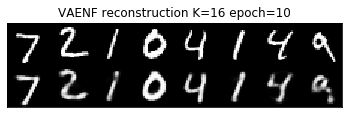

====> Test set loss: 89.1586
Train Epoch: 11 [0/60000 (0%)]	Loss: 88.773145
====> Epoch: 11 Average loss: 79.6172


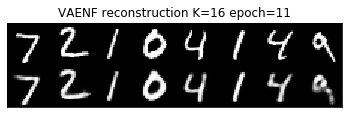

====> Test set loss: 77.1038


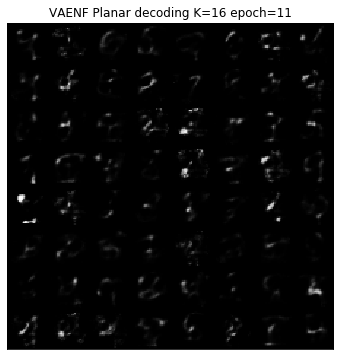

Train Epoch: 12 [0/60000 (0%)]	Loss: 79.485371
====> Epoch: 12 Average loss: 75.6746


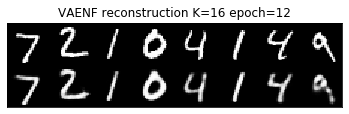

====> Test set loss: 75.5821
Train Epoch: 13 [0/60000 (0%)]	Loss: 72.879468
====> Epoch: 13 Average loss: 74.5217


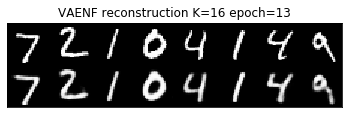

====> Test set loss: 76.5404
Train Epoch: 14 [0/60000 (0%)]	Loss: 77.021074
====> Epoch: 14 Average loss: 76.1341


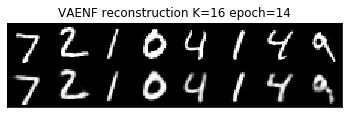

====> Test set loss: 75.3317
Train Epoch: 15 [0/60000 (0%)]	Loss: 77.819614
====> Epoch: 15 Average loss: 73.3849


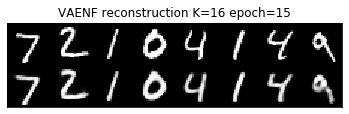

====> Test set loss: 73.6995
Train Epoch: 16 [0/60000 (0%)]	Loss: 70.495703
====> Epoch: 16 Average loss: 72.5117


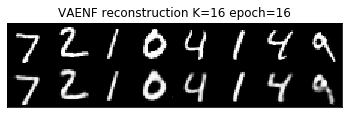

====> Test set loss: 72.7951
Train Epoch: 17 [0/60000 (0%)]	Loss: 72.827495
====> Epoch: 17 Average loss: 75.3678


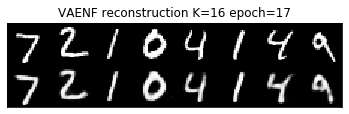

====> Test set loss: 83.2792
Train Epoch: 18 [0/60000 (0%)]	Loss: 85.213232
====> Epoch: 18 Average loss: 102.9374


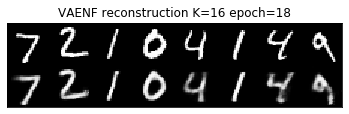

====> Test set loss: 88.1679
Train Epoch: 19 [0/60000 (0%)]	Loss: 85.017061
====> Epoch: 19 Average loss: 85.1276


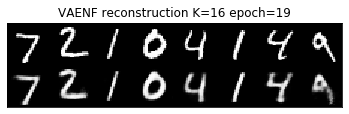

====> Test set loss: 81.6388
Train Epoch: 20 [0/60000 (0%)]	Loss: 78.151191
====> Epoch: 20 Average loss: 81.3971


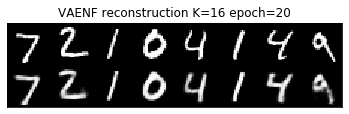

====> Test set loss: 80.7524
Train Epoch: 21 [0/60000 (0%)]	Loss: 80.501958
====> Epoch: 21 Average loss: 82.4785


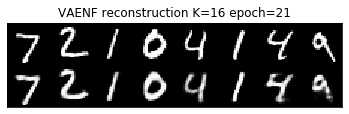

====> Test set loss: 92.9265


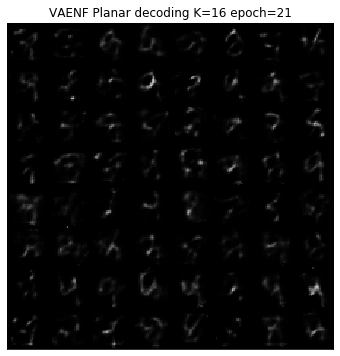

Train Epoch: 22 [0/60000 (0%)]	Loss: 90.100410
====> Epoch: 22 Average loss: 85.0978


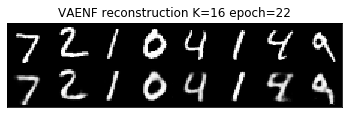

====> Test set loss: 89.6679
Train Epoch: 23 [0/60000 (0%)]	Loss: 84.676670
====> Epoch: 23 Average loss: 83.0905


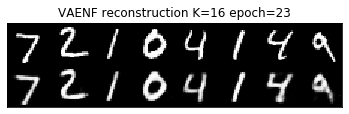

====> Test set loss: 81.2540
Train Epoch: 24 [0/60000 (0%)]	Loss: 75.772129
====> Epoch: 24 Average loss: 84.1938


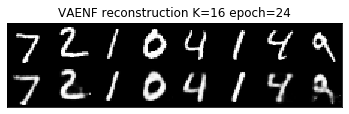

====> Test set loss: 86.8602
Train Epoch: 25 [0/60000 (0%)]	Loss: 82.800293
====> Epoch: 25 Average loss: 80.5857


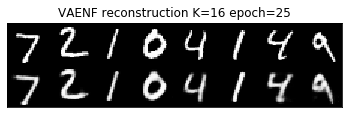

====> Test set loss: 80.7212
Train Epoch: 26 [0/60000 (0%)]	Loss: 77.909272
====> Epoch: 26 Average loss: 80.5231


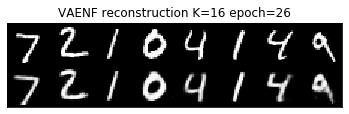

====> Test set loss: 80.9065
Train Epoch: 27 [0/60000 (0%)]	Loss: 78.337510
====> Epoch: 27 Average loss: 80.0029


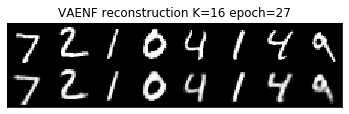

====> Test set loss: 80.3791
Train Epoch: 28 [0/60000 (0%)]	Loss: 79.899136
====> Epoch: 28 Average loss: 92.5253


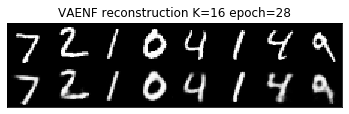

====> Test set loss: 87.9740
Train Epoch: 29 [0/60000 (0%)]	Loss: 88.886611
====> Epoch: 29 Average loss: 87.7147


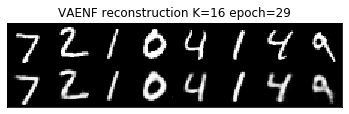

====> Test set loss: 89.3531
Train Epoch: 30 [0/60000 (0%)]	Loss: 87.934893
====> Epoch: 30 Average loss: 85.5477


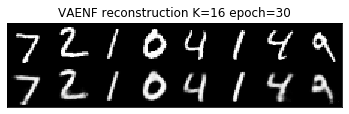

====> Test set loss: 83.7143
Train Epoch: 31 [0/60000 (0%)]	Loss: 78.244687
====> Epoch: 31 Average loss: 80.0136


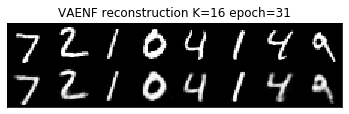

====> Test set loss: 79.2867


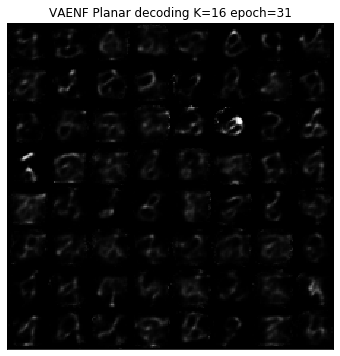

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.491406
====> Epoch: 1 Average loss: 150.1285


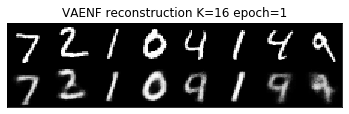

====> Test set loss: 113.1675


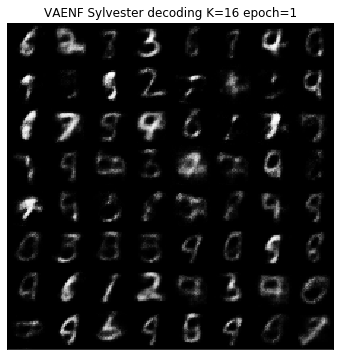

Train Epoch: 2 [0/60000 (0%)]	Loss: 100.777686
====> Epoch: 2 Average loss: 104.1721


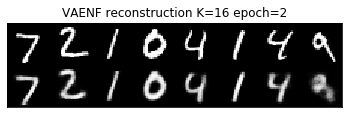

====> Test set loss: 98.3573
Train Epoch: 3 [0/60000 (0%)]	Loss: 101.756514
====> Epoch: 3 Average loss: 94.7466


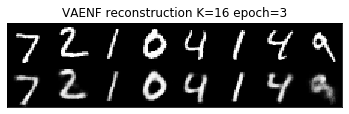

====> Test set loss: 91.9200
Train Epoch: 4 [0/60000 (0%)]	Loss: 94.018086
====> Epoch: 4 Average loss: 89.6730


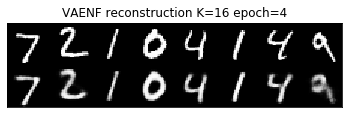

====> Test set loss: 88.0941
Train Epoch: 5 [0/60000 (0%)]	Loss: 84.789746
====> Epoch: 5 Average loss: 87.2723


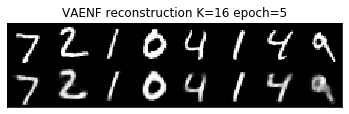

====> Test set loss: 87.0168
Train Epoch: 6 [0/60000 (0%)]	Loss: 86.599629
====> Epoch: 6 Average loss: 85.5448


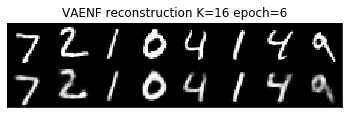

====> Test set loss: 85.8175
Train Epoch: 7 [0/60000 (0%)]	Loss: 85.249648
====> Epoch: 7 Average loss: 84.0500


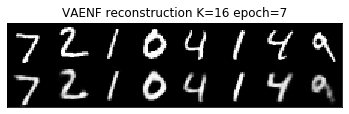

====> Test set loss: 84.2107
Train Epoch: 8 [0/60000 (0%)]	Loss: 84.017461
====> Epoch: 8 Average loss: 82.9190


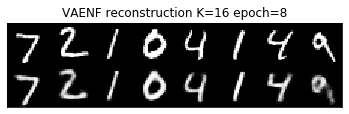

====> Test set loss: 82.8168
Train Epoch: 9 [0/60000 (0%)]	Loss: 85.133916
====> Epoch: 9 Average loss: 81.8704


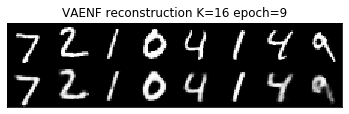

====> Test set loss: 81.8942
Train Epoch: 10 [0/60000 (0%)]	Loss: 77.430029
====> Epoch: 10 Average loss: 80.8414


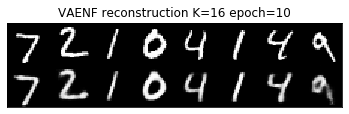

====> Test set loss: 80.9381
Train Epoch: 11 [0/60000 (0%)]	Loss: 84.816699
====> Epoch: 11 Average loss: 80.0824


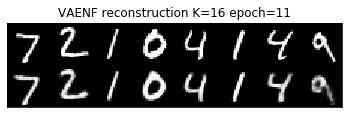

====> Test set loss: 80.5561


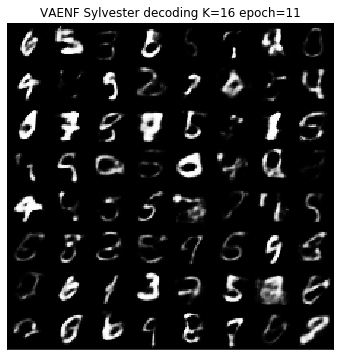

Train Epoch: 12 [0/60000 (0%)]	Loss: 84.091670
====> Epoch: 12 Average loss: 79.3398


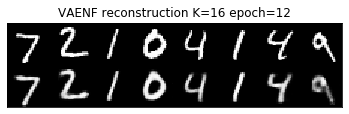

====> Test set loss: 79.6813
Train Epoch: 13 [0/60000 (0%)]	Loss: 78.821602
====> Epoch: 13 Average loss: 78.7710


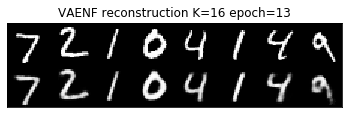

====> Test set loss: 79.7257
Train Epoch: 14 [0/60000 (0%)]	Loss: 77.134009
====> Epoch: 14 Average loss: 78.1479


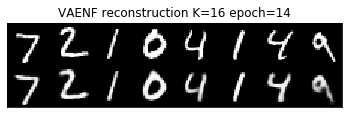

====> Test set loss: 79.1455
Train Epoch: 15 [0/60000 (0%)]	Loss: 76.379146
====> Epoch: 15 Average loss: 77.6740


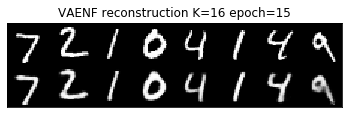

====> Test set loss: 78.5624
Train Epoch: 16 [0/60000 (0%)]	Loss: 78.895991
====> Epoch: 16 Average loss: 77.0871


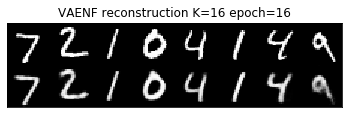

====> Test set loss: 78.8240
Train Epoch: 17 [0/60000 (0%)]	Loss: 73.332925
====> Epoch: 17 Average loss: 76.7775


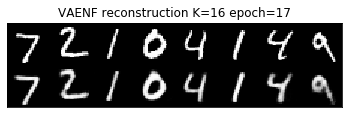

====> Test set loss: 77.8478
Train Epoch: 18 [0/60000 (0%)]	Loss: 76.629624
====> Epoch: 18 Average loss: 76.4117


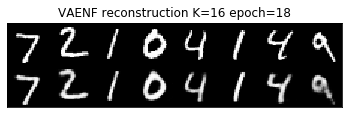

====> Test set loss: 77.9627
Train Epoch: 19 [0/60000 (0%)]	Loss: 74.704512
====> Epoch: 19 Average loss: 76.1106


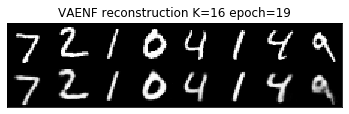

====> Test set loss: 77.2844
Train Epoch: 20 [0/60000 (0%)]	Loss: 74.316211
====> Epoch: 20 Average loss: 75.7925


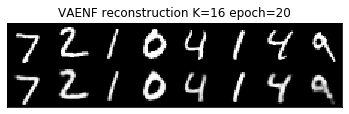

====> Test set loss: 77.3087
Train Epoch: 21 [0/60000 (0%)]	Loss: 73.611885
====> Epoch: 21 Average loss: 75.5207


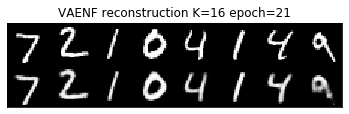

====> Test set loss: 76.6613


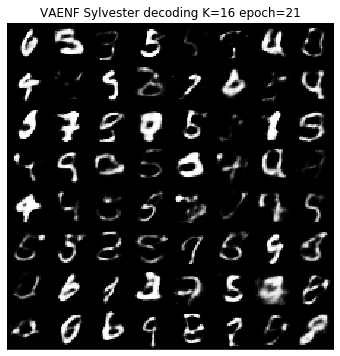

Train Epoch: 22 [0/60000 (0%)]	Loss: 73.426045
====> Epoch: 22 Average loss: 75.2186


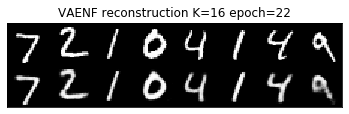

====> Test set loss: 76.6428
Train Epoch: 23 [0/60000 (0%)]	Loss: 74.747432
====> Epoch: 23 Average loss: 75.0275


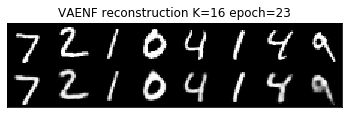

====> Test set loss: 76.3314
Train Epoch: 24 [0/60000 (0%)]	Loss: 75.034873
====> Epoch: 24 Average loss: 74.6811


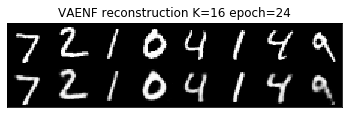

====> Test set loss: 75.6236
Train Epoch: 25 [0/60000 (0%)]	Loss: 73.436157
====> Epoch: 25 Average loss: 74.3999


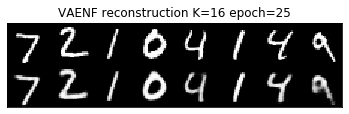

====> Test set loss: 75.6421
Train Epoch: 26 [0/60000 (0%)]	Loss: 76.496211
====> Epoch: 26 Average loss: 74.2765


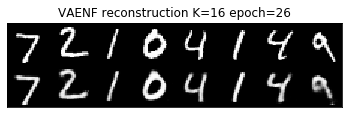

====> Test set loss: 75.8722
Train Epoch: 27 [0/60000 (0%)]	Loss: 74.337373
====> Epoch: 27 Average loss: 74.0084


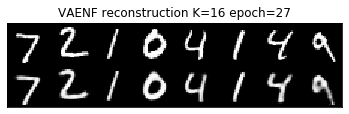

====> Test set loss: 75.3366
Train Epoch: 28 [0/60000 (0%)]	Loss: 70.956846
====> Epoch: 28 Average loss: 73.7285


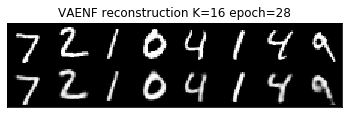

====> Test set loss: 75.3110
Train Epoch: 29 [0/60000 (0%)]	Loss: 72.668159
====> Epoch: 29 Average loss: 73.5380


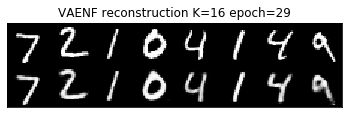

====> Test set loss: 75.1318
Train Epoch: 30 [0/60000 (0%)]	Loss: 79.436968
====> Epoch: 30 Average loss: 73.3358


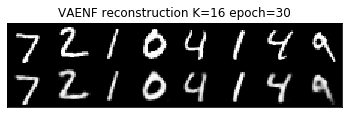

====> Test set loss: 75.2696
Train Epoch: 31 [0/60000 (0%)]	Loss: 73.515674
====> Epoch: 31 Average loss: 73.2451


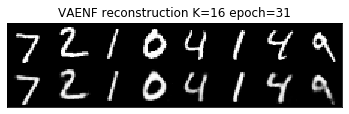

====> Test set loss: 74.8005


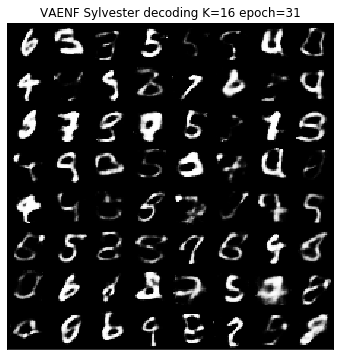

In [11]:
sample = torch.randn(64, 20, device=DEVICE)
for i in range(3):
    is_vae_with_nf = isinstance(vaes[i], VariationalAutoencoderNormalizingFlow)
    for epoch in range(1, 31 + 1):
        train(epoch, vaes[i], optimizers[i], train_loader, DEVICE)
        test(epoch, vaes[i], test_loader, DEVICE)
        if epoch % 10 == 1:
            with torch.no_grad():
                if is_vae_with_nf:
                    _ , _, params = vaes[i].encode(large_batch)
                    sample_dec = vaes[i].decode( vaes[i].flow.forward( sample, params ) )
                else:
                    sample_dec = vaes[i].decode(sample)
                plot_image(sample_dec.view(64, 1, 28, 28),
                    '{} decoding K={} epoch={}'.format(vae_names[i], flow_len, epoch), figsize=[6, 6], padding=0)
    